In [1]:
import json
import requests
import numpy as np
import pandas as pd
from config import Cfg as cfg

In [2]:
df_races = pd.read_csv('./../data/geo-data/races_lat_lon.csv')
df_races.head()

,race,lat,lon
0,alagoas70.3,-9.661669,-35.701667
1,arizona,33.433518,-111.937962
2,Arizona70.3,33.432270,-111.932982
3,astana70.3,51.125358,71.453152
4,atlanticcity70.3,39.350119,-74.449387


# Recommended venues
(https://developer.foursquare.com/docs/api/venues/explore)

#### Description
Returns a list of recommended venues near the current location. 

In [4]:
categories = {
#     'nightlife':     '4d4b7105d754a06376d81259',
#     'food':          '4d4b7105d754a06374d81259',
#     'entertainment': '4d4b7104d754a06370d81259',
#     'hotels': '4bf58dd8d48988d1fa931735',
#     'shops_services': '4d4b7105d754a06378d81259',
    'shops_bike': '4bf58dd8d48988d115951735',
    'pool': '4bf58dd8d48988d15e941735',
    'athletic_centers': '4f4528bc4b90abdf24c9de85',
    'fitness_centers': '4bf58dd8d48988d175941735'
}

In [10]:
radius = 50000 # in meters

# initialize dict
races_poi = {}

for category in categories:
    categoryId = categories[category]
    
    temp_category = {}
    
    for race in df_races.race:
        # need 5 decimal places
        lat = df_races.loc[df_races.race == race, 'lat'].values[0]
        lng = df_races.loc[df_races.race == race, 'lon'].values[0]
        races_poi[race] = {'lat': lat, 'lng': lng}
        temp_category[race] = {'lat': lat, 'lng': lng}
        
        
        # foursquare api
        # construct request by categories. 50km radius
        requestString = f"https://api.foursquare.com/v2/venues/explore?ll={lat},{lng}&radius={radius}&limit=50&categoryId={categoryId}&client_id={cfg.foursquare_client}&client_secret={cfg.foursquare_client_secret}&v=20190303"
        r = requests.get(requestString)
        response = r.json()['response']
        n_results = response['totalResults']
        bounds = response['suggestedBounds']
        typePOI = response['query']
        items = response['groups'][0]['items']
        
        races_poi[race][category] = {}
        
        for store_dict in [races_poi[race][category], temp_category[race]]:
            store_dict['poi_n_results'] = n_results
            store_dict['poi_bounds'] = bounds
            store_dict['poi_type'] = typePOI
            store_dict['items'] = items
            
    # save data
    with open(f'./../data/geo-data/races-poi-{category}-{int(radius/1000)}km.json', 'w') as f:
        f.write(json.dumps(temp_category))





KeyError: 'totalResults'

In [ ]:
r.json()

In [24]:
len(temp_category)

151

In [5]:
r.json()

{'meta': {'code': 500,
  'errorType': 'server_error',
  'errorDetail': 'Foursquare servers are experiencing problems. Please retry and check status.foursquare.com for updates.'},
 'response': {}}

In [3]:
# initialize dict
races_pois_entertainment = {}

for race in races_locations:
    info = races_locations[race][0] # take first result
    lat = info['geometry']['lat']
    lng = info['geometry']['lng']
    races_pois_entertainment[race] = {'lat': lat, 'lng': lng}


In [24]:
# for race in races_pois_entertainment:
#     lat = races_pois_entertainment[race]['lat']
#     lng = races_pois_entertainment[race]['lng']
    
#     # foursquare api
#     # entairtainment category. 10km radius
#     requestString = f"https://api.foursquare.com/v2/venues/explore?ll={lat},{lng}&radius=100000&limit=50&categoryId=4d4b7104d754a06370d81259&client_id={cfg.foursquare_client}&client_secret={cfg.foursquare_client_secret}&v=20190303"
#     r = requests.get(requestString)

#     response = r.json()['response']
#     n_results = response['totalResults']
#     bounds = response['suggestedBounds']
#     typePOI = response['query']
#     items = response['groups'][0]['items']

#     races_pois_entertainment[race]['poi_n_results'] = n_results
#     races_pois_entertainment[race]['poi_bounds'] = bounds
#     races_pois_entertainment[race]['poi_type'] = typePOI
#     races_pois_entertainment[race]['items'] = items


In [47]:
# save geo data
with open('./../data/geo-data/races-pois-entertainment-data.json', 'w') as f:
    f.write(json.dumps(races_pois_entertainment))

In [27]:
numbers_entairtainment = []
for race in races_pois_entertainment:
    numbers_entairtainment.append(races_pois_entertainment[race]['poi_n_results'])

In [30]:
for race in races_pois_entertainment:
    if races_pois_entertainment[race]['poi_n_results'] > 200:
        print(race)

Monterrey, Mexico
Putrajaya, Malaysia
Haines City, Florida
Staffordshire, England
Racine, Wisconsin
Calella, Spain
Buenos Aires, Argentina
Miami, Florida
Incheon, Korea
Singapore
Copenhagen, Denmark
Windsor, California
Hamburg, Germany
Zurich, Switzerland
Henderson, Nevada
Budapest, Hungary
Santa Rosa, California
Lawrence, Kansas
Frankfurt, Germany
Williamsburg, Virginia
Tempe, Arizona 
Subic Bay, Philippines
Princeton, New Jersey, USA
Centrair Tokoname, Japan
Bolton, England
Austin, Texas
Lahti, Finland
Boulder, Colorado
Tempe, AZ
Geelong, Victoria
Cascais, Portugal
Lake Stevens, Washington
Edinburgh, Scotland
Providence, Rhode Island
New York City, NY
Imperial Beach, California
Bintan, Indonesia
Santa Cruz, California
Galveston, Texas
Limburg, The Netherlands
Cambridge, Maryland
Belek, Turkey
Raleigh, North Carolina
The Woodlands, Texas
Elsinore, Denmark
Oceanside, California


# Recommended food places

In [48]:
# initialize dict
races_pois_food = {}

for race in races_locations:
    info = races_locations[race][0] # take first result
    lat = info['geometry']['lat']
    lng = info['geometry']['lng']
    races_pois_food[race] = {'lat': lat, 'lng': lng}



In [50]:
for race in races_pois_food:
    lat = races_pois_food[race]['lat']
    lng = races_pois_food[race]['lng']
    
    # foursquare api
    # entairtainment category. 10km radius
    requestString = f"https://api.foursquare.com/v2/venues/explore?ll={lat},{lng}&radius=100000&limit=50&categoryId=4d4b7105d754a06374d81259&client_id={cfg.foursquare_client}&client_secret={cfg.foursquare_client_secret}&v=20190303"
    r = requests.get(requestString)

    response = r.json()['response']
    n_results = response['totalResults']
    bounds = response['suggestedBounds']
    typePOI = response['query']
    items = response['groups'][0]['items']

    races_pois_food[race]['poi_n_results'] = n_results
    races_pois_food[race]['poi_bounds'] = bounds
    races_pois_food[race]['poi_type'] = typePOI
    races_pois_food[race]['items'] = items

In [51]:
# save geo data
with open('./../data/geo-data/races-pois-food-data.json', 'w') as f:
    f.write(json.dumps(races_pois_food))

In [52]:
numbers_food = []
for race in races_pois_food:
    numbers_food.append(races_pois_food[race]['poi_n_results'])

## Results

In [53]:
import matplotlib.pyplot as plt

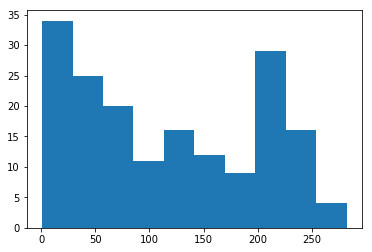

In [55]:
plt.hist(numbers_entertainment);

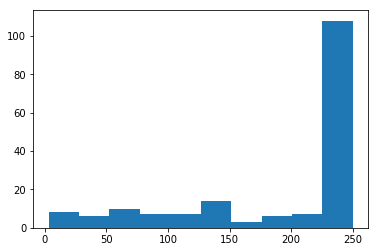

In [56]:
plt.hist(numbers_food);